# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.019250e+01     6.794518e+00
 * time: 0.004637002944946289
     1     2.742949e+01     4.034880e+00
 * time: 0.01367497444152832
     2     1.866797e+01     3.982221e+00
 * time: 0.03624105453491211
     3     1.830800e+01     4.970802e+00
 * time: 0.0588688850402832
     4     1.292551e+01     2.027628e+00
 * time: 0.08022284507751465
     5     1.085339e+01     7.049357e-01
 * time: 0.10025191307067871
     6     1.035721e+01     9.820287e-01
 * time: 0.11632895469665527
     7     9.976802e+00     6.590519e-01
 * time: 0.13322806358337402
     8     9.803302e+00     5.798816e-01
 * time: 0.14932489395141602
     9     9.669176e+00     5.832532e-01
 * time: 0.16547799110412598
    10     9.542913e+00     4.586378e-01
 * time: 0.1815509796142578
    11     9.537857e+00     1.033832e+00
 * time: 0.19441795349121094
    12     9.446267e+00     6.400698e-01
 * time: 0.20658397674560547
    13     9.274992e+00     7.804483e-01
 * time: 

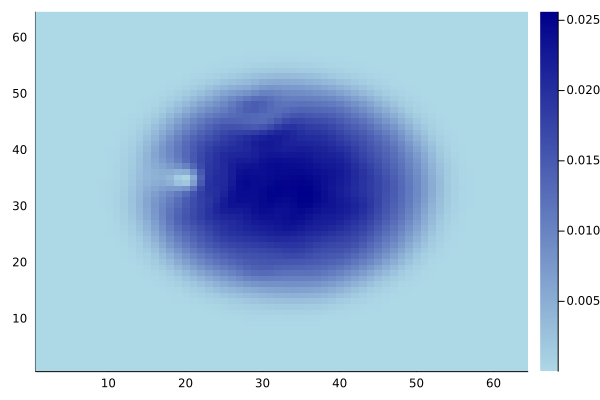

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)